In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Wine_clust.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.shape

(178, 13)

In [4]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
data.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [7]:
dupli=data[data.duplicated()]
dupli

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


<AxesSubplot:>

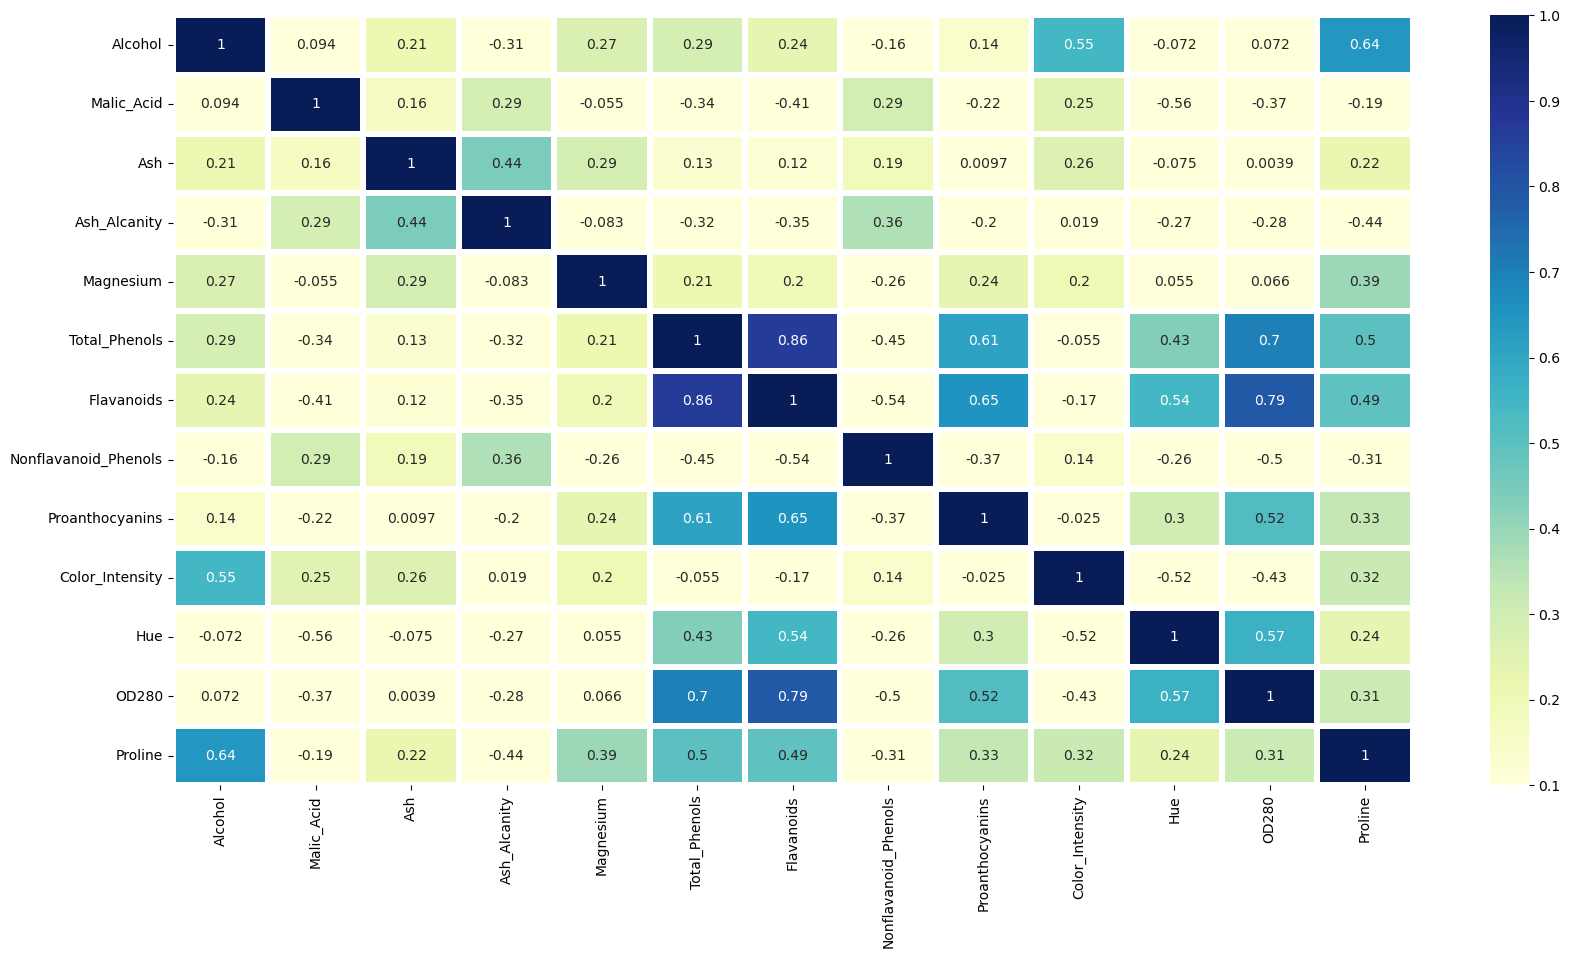

In [8]:
#plotting correlation matrix
plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,vmin=0.1,vmax=1,linewidth=3,cmap='YlGnBu')

# Treating Outliers

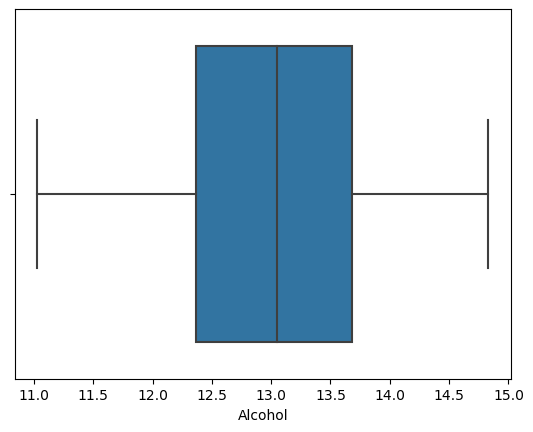

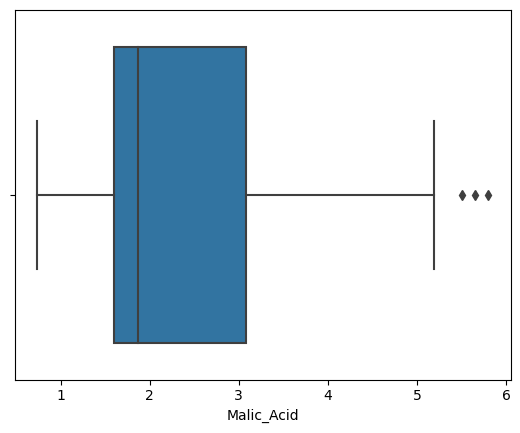

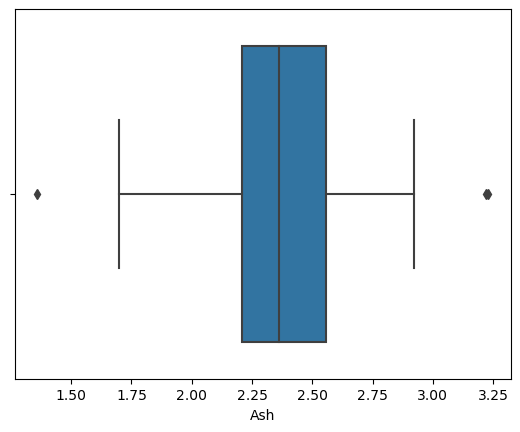

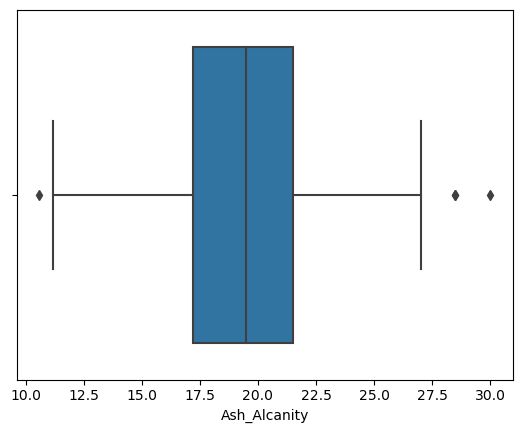

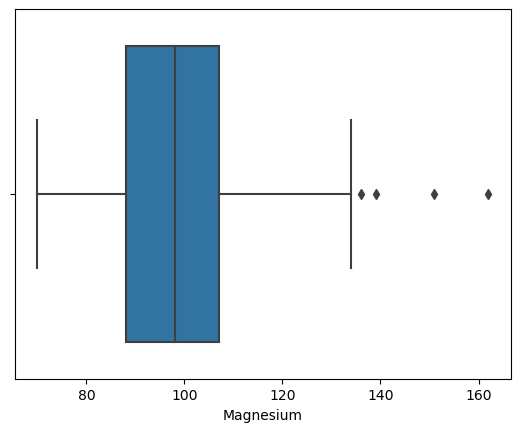

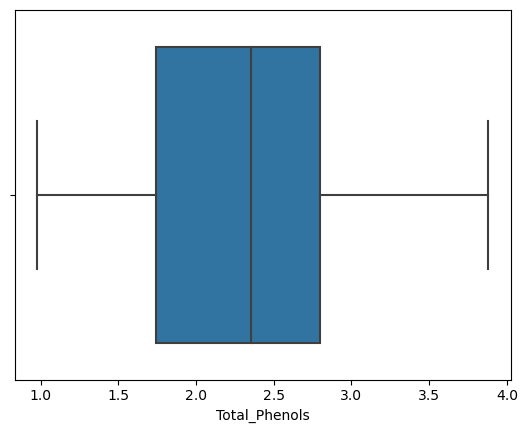

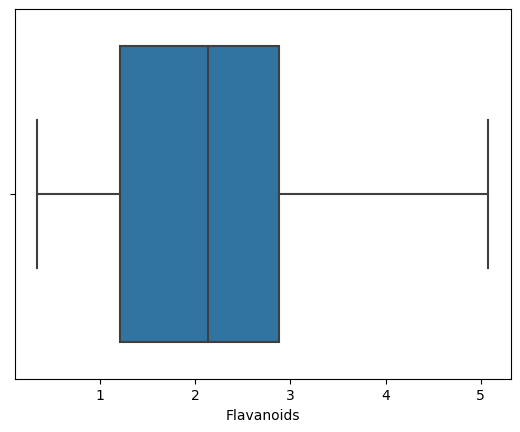

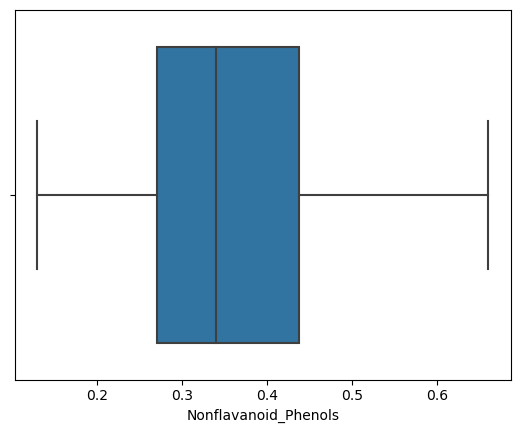

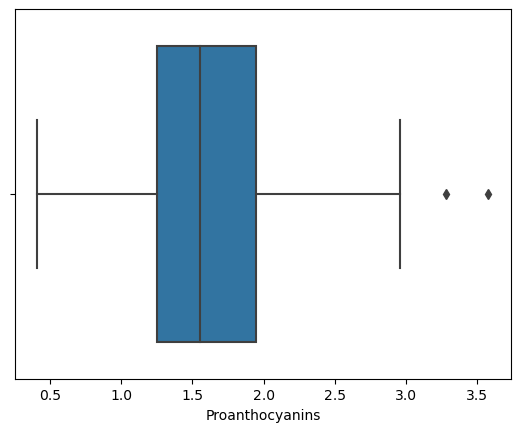

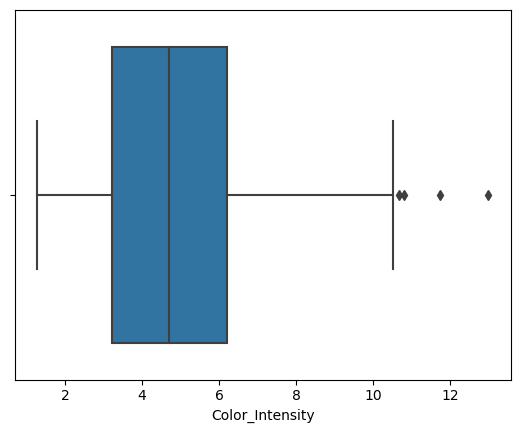

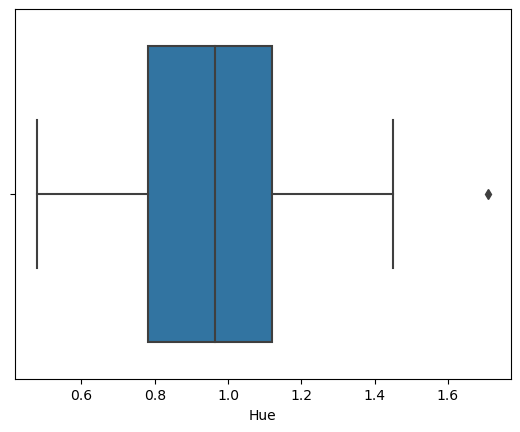

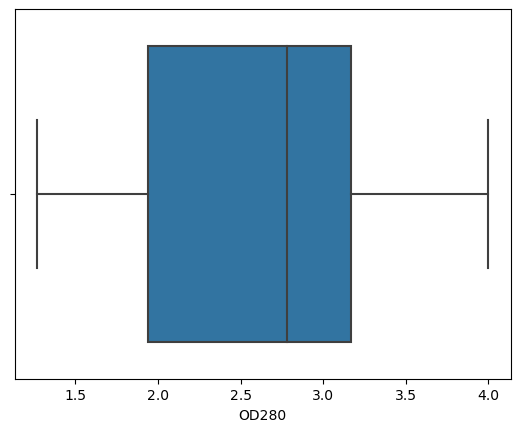

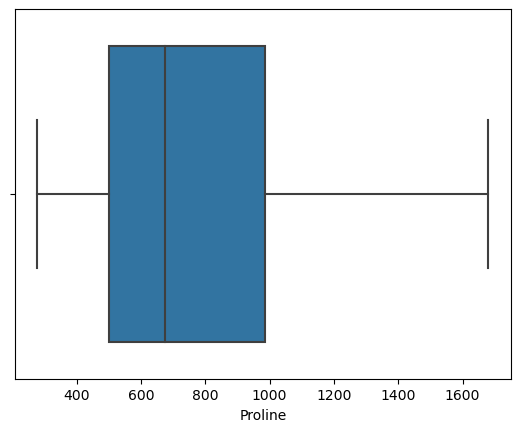

In [9]:
for i in data:
  sns.boxplot(x=data[i])
  plt.show()

In [10]:
from scipy import stats

In [11]:
IQR=stats.iqr(data.Malic_Acid,interpolation='midpoint')
IQR

1.46

In [12]:
Q1=data.Malic_Acid.quantile(0.25)
Q3=data.Malic_Acid.quantile(0.75)
max_limit=Q3+1.5*IQR
min_limit=Q1-1.5*IQR
min_limit,max_limit

(-0.5874999999999999, 5.2725)

In [13]:
data.loc[data.Malic_Acid>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380
137,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740


In [14]:
data.loc[data.Malic_Acid<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [15]:
data.loc[data.Malic_Acid>max_limit,'Malic_Acid']=np.median(data.Malic_Acid)

In [16]:
data.loc[data.Malic_Acid>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [17]:
IQR=stats.iqr(data.Ash,interpolation='midpoint')
IQR

0.34499999999999975

In [18]:
Q1=data.Ash.quantile(0.25)
Q3=data.Ash.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(1.6925000000000003, 3.0749999999999997)

In [19]:
data.loc[data.Ash>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


In [20]:
data.loc[data.Ash<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520


In [21]:
data.loc[data.Ash<min_limit,'Ash']=np.median(data.Ash)

In [22]:
data.loc[data.Ash>max_limit,'Ash']=np.median(data.Ash)

In [23]:
data.loc[data.Ash<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [24]:
data.loc[data.Ash>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [25]:
IQR=stats.iqr(data.Ash_Alcanity,interpolation='midpoint')
IQR

4.300000000000001

In [26]:
Q1=data.Ash_Alcanity.quantile(0.25)
Q3=data.Ash_Alcanity.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(10.749999999999998, 27.950000000000003)

In [27]:
data.loc[data.Ash_Alcanity<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
59,12.37,0.94,2.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520


In [28]:
data.loc[data.Ash_Alcanity<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
59,12.37,0.94,2.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520


In [29]:
data.loc[data.Ash_Alcanity>max_limit,'Ash_Alcanity']=np.median(data.Ash_Alcanity)
data.loc[data.Ash_Alcanity<min_limit,'Ash_Alcanity']=np.median(data.Ash_Alcanity)

In [30]:
data.loc[data.Ash_Alcanity<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [31]:
data.loc[data.Ash_Alcanity>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [32]:
IQR=stats.iqr(data.Magnesium,interpolation='midpoint')
IQR

19.0

In [33]:
Q1=data.Magnesium.quantile(0.25)
Q3=data.Magnesium.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(59.5, 135.5)

In [34]:
data.loc[data.Magnesium<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [35]:
data.loc[data.Magnesium>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
69,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
73,12.99,1.67,2.60,19.5,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937


In [36]:
data.loc[data.Magnesium>max_limit,'Magnesium']=np.median(data.Magnesium)

In [37]:
data.loc[data.Magnesium>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [38]:
IQR=stats.iqr(data.Proanthocyanins,interpolation='midpoint')
IQR

0.7

In [39]:
Q1=data.Proanthocyanins.quantile(0.25)
Q3=data.Proanthocyanins.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(0.20000000000000018, 3.0)

In [40]:
data.loc[data.Proanthocyanins<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [41]:
data.loc[data.Proanthocyanins>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
95,12.47,1.52,2.20,19.0,98,2.50,2.27,0.32,3.28,2.6,1.16,2.63,937
110,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.9,0.75,2.81,562


In [42]:
data.loc[data.Magnesium>max_limit,'Proanthocyanins']=np.median(data.Proanthocyanins)

In [43]:
data.loc[data.Proanthocyanins>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [44]:
IQR=stats.iqr(data.Color_Intensity,interpolation='midpoint')
IQR

2.97

In [45]:
Q1=data.Color_Intensity.quantile(0.25)
Q3=data.Color_Intensity.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-1.2350000000000003, 10.655000000000001)

In [46]:
data.loc[data.Color_Intensity<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [47]:
data.loc[data.Color_Intensity>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
151,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.555,10.80,0.48,1.47,480
158,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,1.555,13.00,0.57,1.96,660
159,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,1.555,11.75,0.57,1.78,620
166,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.555,10.68,0.85,1.56,695


In [48]:
data.loc[data.Color_Intensity>max_limit,'Color_Intensity']=np.median(data.Color_Intensity)

In [49]:
data.loc[data.Color_Intensity>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [50]:
IQR=stats.iqr(data.Hue,interpolation='midpoint')
IQR

0.3350000000000001

In [51]:
Q1=data.Hue.quantile(0.25)
Q3=data.Hue.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(0.2799999999999998, 1.6225000000000003)

In [52]:
data.loc[data.Hue<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [53]:
data.loc[data.Hue>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
115,11.03,1.51,2.2,21.5,85,2.46,2.17,0.52,1.555,1.9,1.71,2.87,407


In [54]:
data.loc[data.Hue>max_limit,'Hue']=np.median(data.Hue)

In [55]:
data.loc[data.Hue>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


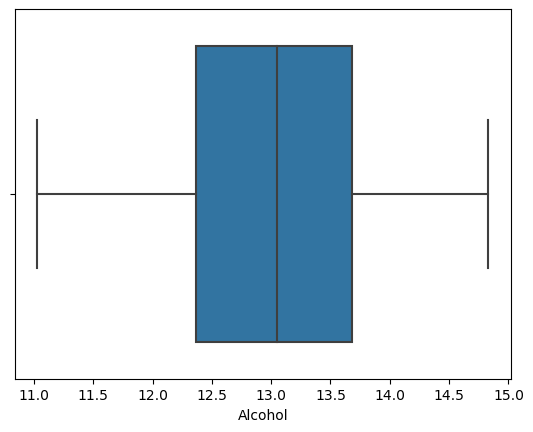

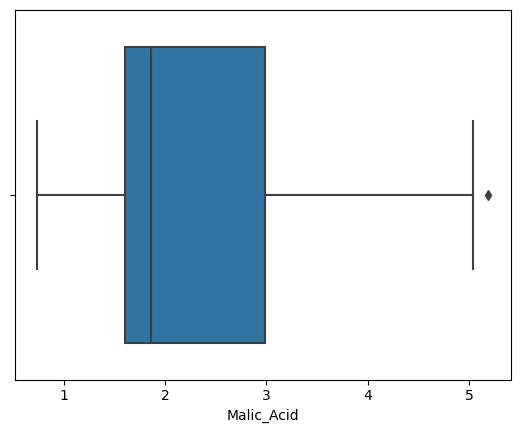

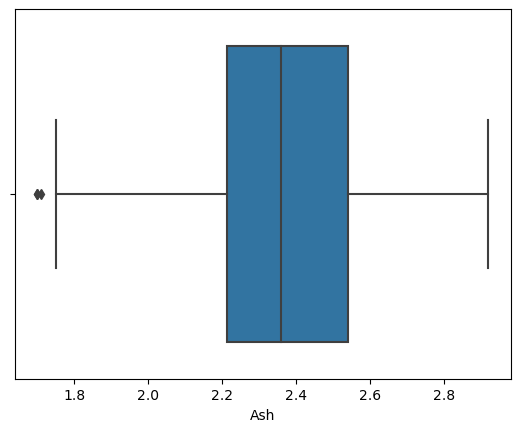

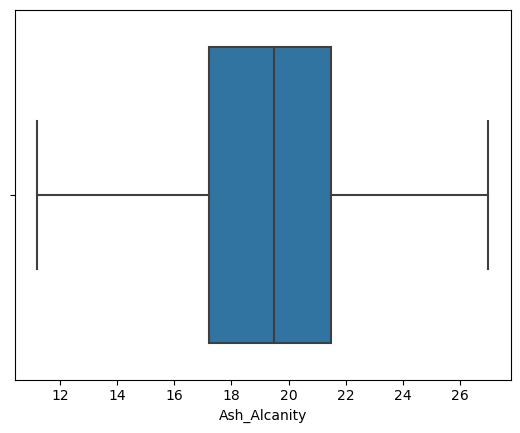

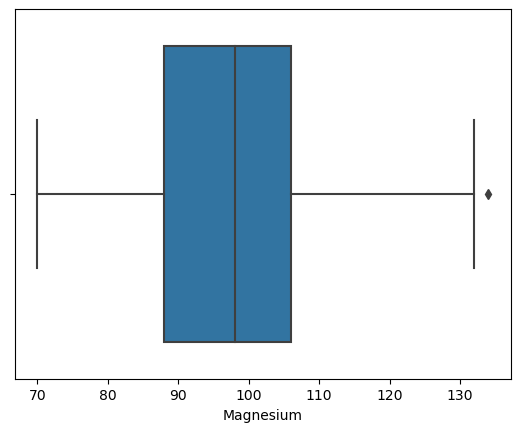

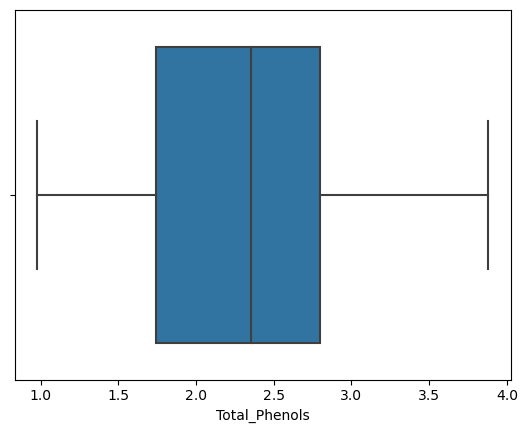

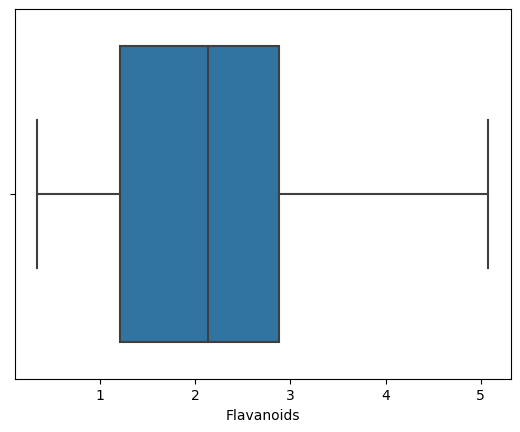

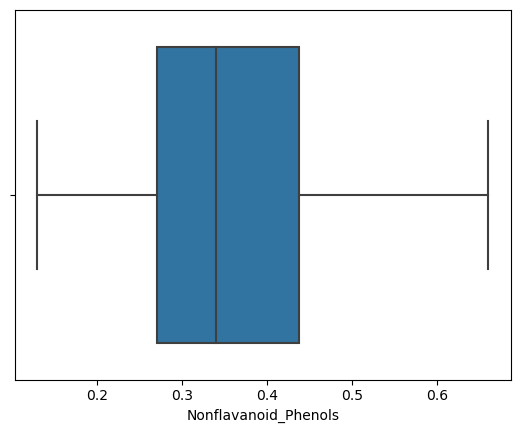

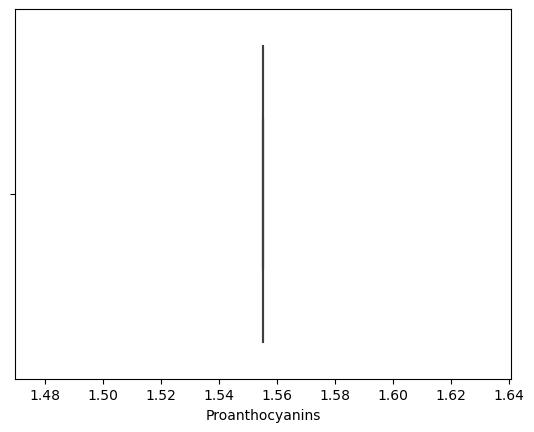

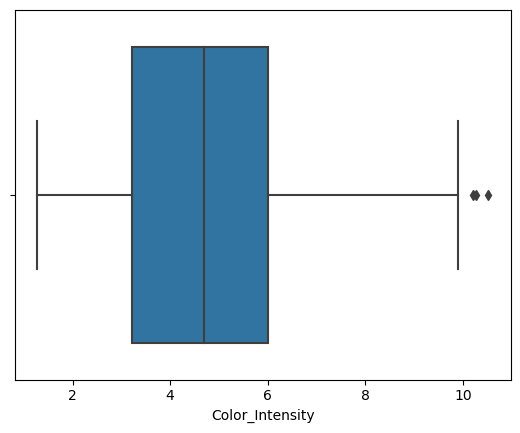

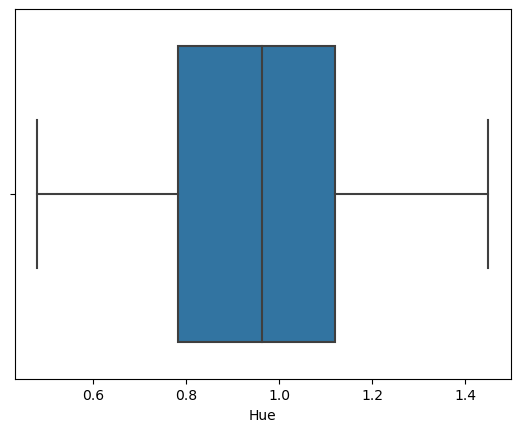

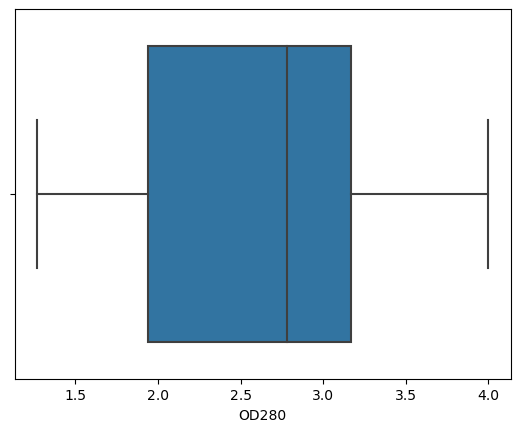

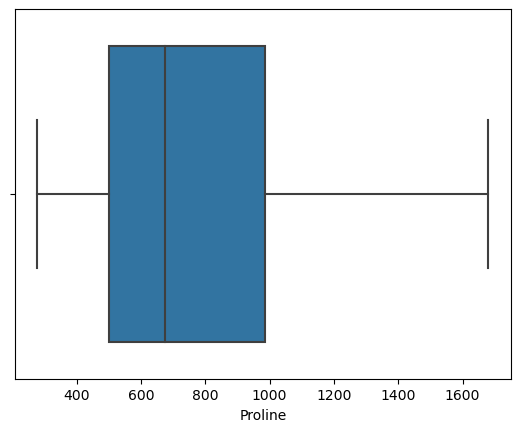

In [56]:
for i in data:
    sns.boxplot(x=data[i])
    plt.show()

# kMeans Clustering

In [57]:
from sklearn.cluster import KMeans

In [58]:
wcss =[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [59]:
wcss

[17582109.163142946,
 4534324.503907534,
 2361953.837267191,
 1324421.9568175245,
 908431.6113888371,
 639403.3103374918,
 403846.08850766823,
 315140.8390773961,
 262114.85587513476,
 210848.40518128913,
 180414.85717561713,
 159605.48591475305]

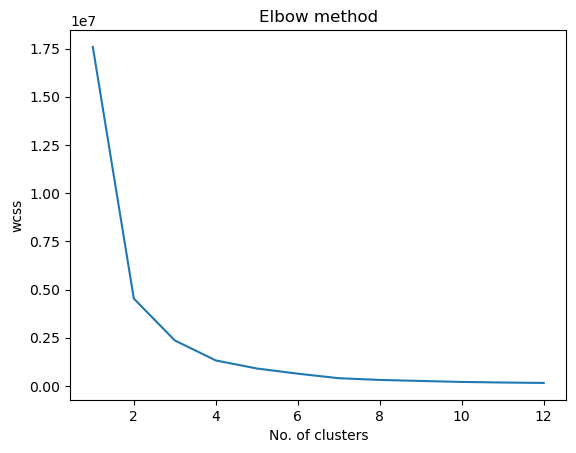

In [60]:
plt.plot(range(1,13),wcss)
plt.title('Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()

In [61]:
#optimum no. of clusters = 4
kmean=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit(data)

In [62]:
y_kmeans

KMeans(n_clusters=12, random_state=42)

In [63]:
y_kmeans=y_kmeans.predict(data)

In [64]:
y_kmeans

array([ 3,  3,  9,  7,  1,  7,  2,  2,  3,  3,  7,  2,  2,  9,  7,  2,  2,
        9,  5,  8,  1,  1,  3,  3,  8,  8,  9,  2,  8,  3,  2,  7,  3,  2,
        3,  8,  8,  9,  3,  1,  1,  3,  3,  6,  8,  3,  3,  3,  3,  2,  9,
        2,  9,  2,  3,  9,  3,  2,  2,  4,  6, 10, 11, 10,  0,  6,  4,  4,
        1,  6,  8, 10, 10,  3,  8, 10,  0,  4,  1, 10,  0,  6, 11,  4,  4,
       10,  4,  4,  6, 11, 10, 10,  4,  0,  0,  8, 11, 10,  6, 10,  6,  4,
       10, 10,  6,  0,  4,  4,  0,  6,  4,  0, 11, 10,  0, 10,  4,  0,  0,
        4, 11, 10,  0,  0,  0,  0,  0, 10,  0, 11, 11,  4,  4, 11, 11,  6,
        6,  4, 11, 11, 11,  1,  4,  4,  8,  8, 10, 11, 11,  4,  4, 10, 10,
        6, 11,  6, 10,  8,  6, 11,  4,  6,  4,  6, 11,  4,  6,  6,  1, 11,
        4, 10,  6,  1,  1,  8,  8,  4])

In [65]:
from sklearn.metrics import silhouette_score
silhouette_sc=silhouette_score(data,y_kmeans)
print(silhouette_sc)

0.5081099069077595


# Agglomerative Hierarchial Clustering

In [66]:
#plotting Dendrogram to find the optimum no. of clusters

In [67]:
import scipy.cluster.hierarchy as sch

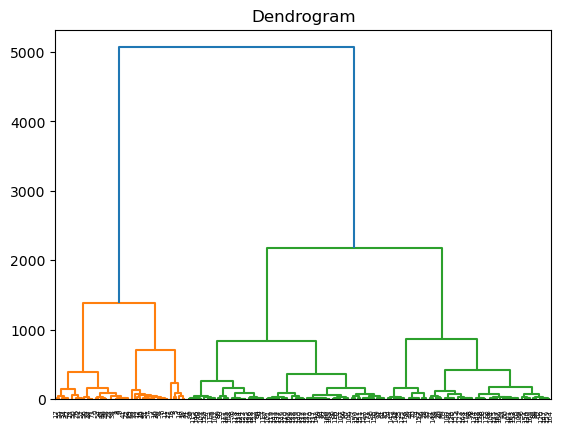

In [68]:
dendrogram = sch.dendrogram(sch.linkage(data,method='ward'))
plt.title('Dendrogram')
plt.show()

In [69]:
#optimum no. of clusters = 2
from sklearn.cluster import AgglomerativeClustering

In [70]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(data)

In [71]:
y_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [72]:
#silhouette score
silhouette_avg=silhouette_score(data,y_hc)
print(silhouette_avg)

0.6577344882033315


# PCA

In [73]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [74]:
scaled_data=sc.fit_transform(data)

In [75]:
scaled_data

array([[ 1.51861254, -0.5476409 ,  0.27397068, ...,  0.392826  ,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.47949003, -0.90162087, ...,  0.43811587,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.08518858,  1.24687403, ...,  0.34753614,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.95446953, -0.4151692 , ..., -1.6452181 ,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.30911287,  0.03074484, ..., -1.59992823,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.77922444,  1.5306375 , ..., -1.55463836,
        -1.42894777, -0.59516041]])

In [76]:
scaled_data=pd.DataFrame(scaled_data,columns=data.columns)
scaled_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.547641,0.273971,-1.254501,2.322386,0.808997,1.034819,-0.659563,0.0,0.352805,0.392826,1.847920,1.013009
1,0.246290,-0.479490,-0.901621,-2.712903,0.111335,0.568648,0.733629,-0.820719,0.0,-0.250988,0.438116,1.113449,0.965242
2,0.196879,0.085189,1.246874,-0.260136,0.193225,0.808997,1.215533,-0.498407,0.0,0.371973,0.347536,0.788587,1.395148
3,1.691550,-0.313981,0.557734,-0.856755,1.175915,2.491446,1.466525,-0.981875,0.0,1.387878,-0.422392,1.184071,2.334574
4,0.295700,0.309113,2.057627,0.535356,1.585369,0.808997,0.663351,0.226796,0.0,-0.279740,0.392826,0.449601,-0.037874


In [77]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

In [78]:
x_pca.shape

(178, 10)

In [79]:
x_pca

array([[-3.21302572, -1.65387997,  0.10332908, ...,  0.83963815,
         0.76417326, -0.28505847],
       [-2.69792477,  0.27337917, -1.79717864, ..., -0.72043055,
         0.67435072, -0.07825674],
       [-1.93996298, -1.0186052 ,  0.91950508, ..., -0.87524636,
        -0.24708415, -0.26560674],
       ...,
       [ 2.60274118, -3.25192538, -1.23232861, ...,  0.21015681,
        -0.89453205, -0.36359161],
       [ 2.35715046, -2.71527907, -0.67475588, ...,  0.26307759,
        -0.14595596, -0.54923067],
       [ 3.32234896, -2.9898551 ,  0.82335741, ...,  0.51878093,
        -0.200577  ,  0.63634795]])

In [80]:
pca.explained_variance_ratio_

array([0.36604166, 0.22027018, 0.10277433, 0.07012594, 0.0596476 ,
       0.04409233, 0.04039961, 0.02693151, 0.02333718, 0.0206303 ])

In [81]:
np.sum(pca.explained_variance_ratio_)

0.9742506445079505

# DB Scan

In [82]:
from sklearn.cluster import DBSCAN

In [83]:
eps=2
min_samples=10

In [84]:
dbscan=DBSCAN(eps=eps,min_samples=min_samples)
y_dbscan=dbscan.fit_predict(scaled_data)

In [85]:
y_dbscan

array([-1, -1,  0, -1, -1,  0,  0,  0, -1, -1, -1,  0,  0, -1, -1,  0, -1,
        0, -1, -1, -1, -1, -1,  0, -1, -1,  0,  0,  0,  0, -1,  0,  0, -1,
        0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1,
        0, -1,  0, -1,  0, -1,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,
        1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1, -1,
       -1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,  2, -1, -1, -1, -1,
       -1, -1, -1,  2, -1, -1, -1,  2, -1, -1, -1,  2, -1, -1,  2, -1, -1,
       -1,  2,  2,  2,  2, -1, -1, -1], dtype=int64)

In [86]:
data['DBSCAN_Cluster']=y_dbscan
data.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,DBSCAN_Cluster
173,13.71,1.865,2.45,20.5,95,1.68,0.61,0.52,1.555,7.7,0.64,1.74,740,2
174,13.40,3.910,2.48,23.0,102,1.80,0.75,0.43,1.555,7.3,0.70,1.56,750,2
175,13.27,4.280,2.26,20.0,120,1.59,0.69,0.43,1.555,10.2,0.59,1.56,835,-1
176,13.17,2.590,2.37,20.0,120,1.65,0.68,0.53,1.555,9.3,0.60,1.62,840,-1
177,14.13,4.100,2.74,24.5,96,2.05,0.76,0.56,1.555,9.2,0.61,1.60,560,-1


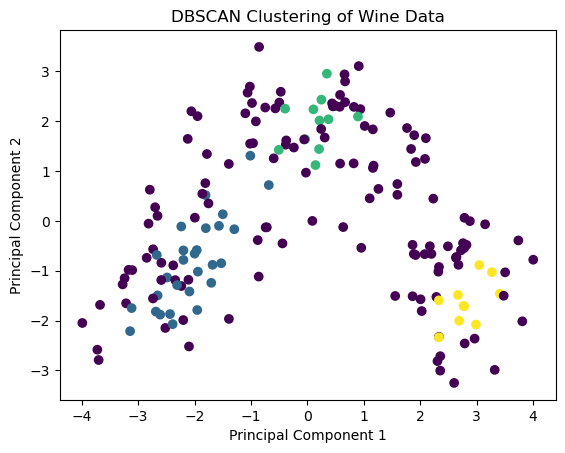

In [87]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=dbscan.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering of Wine Data')
plt.show()

In [88]:
silhouette_scores = []
for n_clusters in range(2, 11):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)
    
silhouette_scores

[-0.10145709738961768,
 -0.10145709738961768,
 -0.10145709738961768,
 -0.10145709738961768,
 -0.10145709738961768,
 -0.10145709738961768,
 -0.10145709738961768,
 -0.10145709738961768,
 -0.10145709738961768]

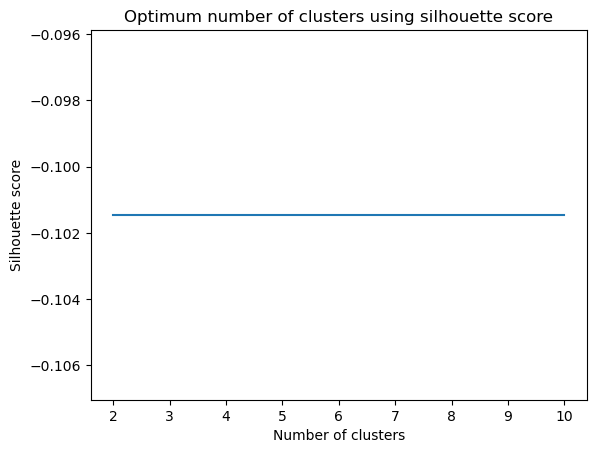

In [89]:
# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Optimum number of clusters using silhouette score')
plt.show()